# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function

### $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make data
x_1 = np.linspace(start=-3, stop=3, num=100)

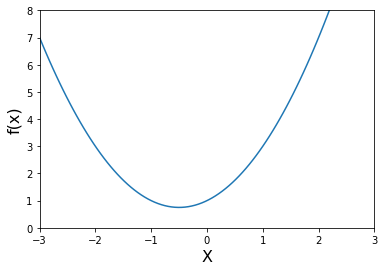

In [4]:
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x_1, f(x_1))
plt.show() #The cost is its lowest value when slope = 0

## Slope and derivatives
In order to count the slope of the function, we need to find its derivative

In [5]:
def df(x):
    return 2*x + 1 

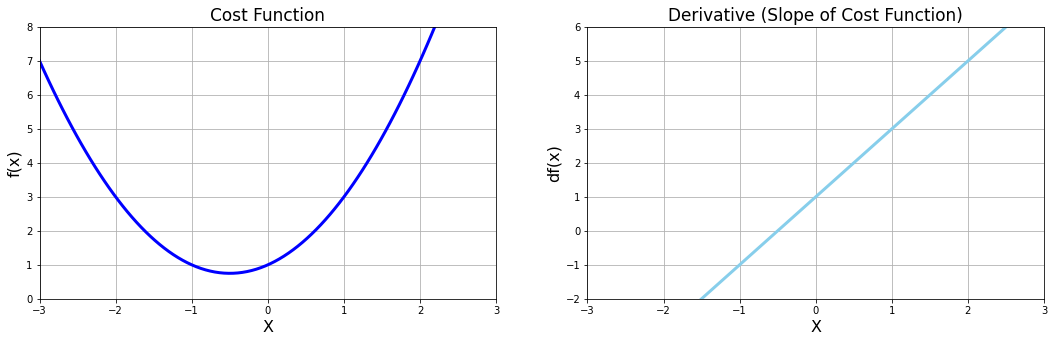

In [6]:
# Plot function and derivative

plt.figure(figsize=[18,5])

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.grid()
plt.plot(x_1, f(x_1), color="blue", linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim([-3,3])
plt.ylim([-2,6])
plt.title('Derivative (Slope of Cost Function)', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color="skyblue", linewidth=3)

plt.show() #The cost is its lowest value when slope = 0

## Gradient descent

In [12]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print(f"Loop ran {n} times.")
        break
    
print("Local minimum occurs at: ", new_x)
print("Slope or df(x) value at this point is: ", df(new_x))
print("f(x) value or cost at this point is: ", f(new_x))

Loop ran 50 times.
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


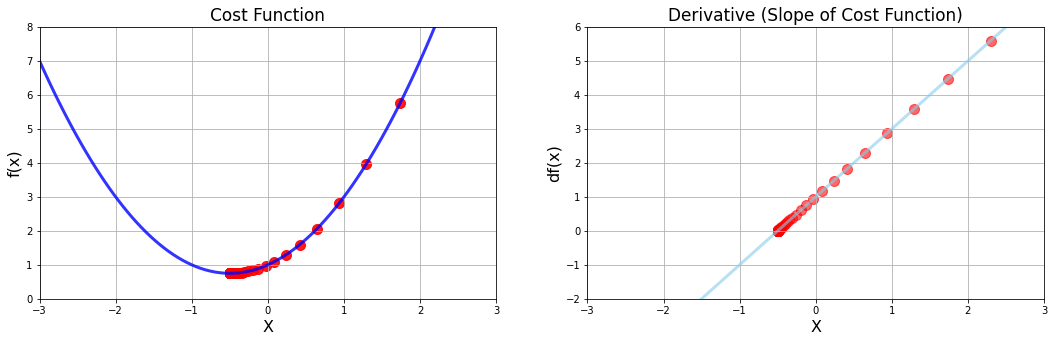

In [20]:
# Superimpose the gradient descend calculations on plot

plt.figure(figsize=[18,5])

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.grid()
plt.plot(x_1, f(x_1), color="blue", linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.9)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim([-3,3])
plt.ylim([-2,6])
plt.title('Derivative (Slope of Cost Function)', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.grid()
plt.plot(x_1, df(x_1), color="skyblue", linewidth=3, alpha=0.6)


plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

plt.show() #The cost is its lowest value when slope = 0

 # Example 2 - Multiple minima vs Initial guess & Advanced functions
 
 ## $$g(x) = x^4 - 4x^2 + 5$$

In [21]:
x_2 = np.linspace(-2, 2, 1000)

In [24]:
def g(x):
    return x**4 - 4*x**2 + 5

In [25]:
def dg(x):
    return 4*x**3 - 8*x

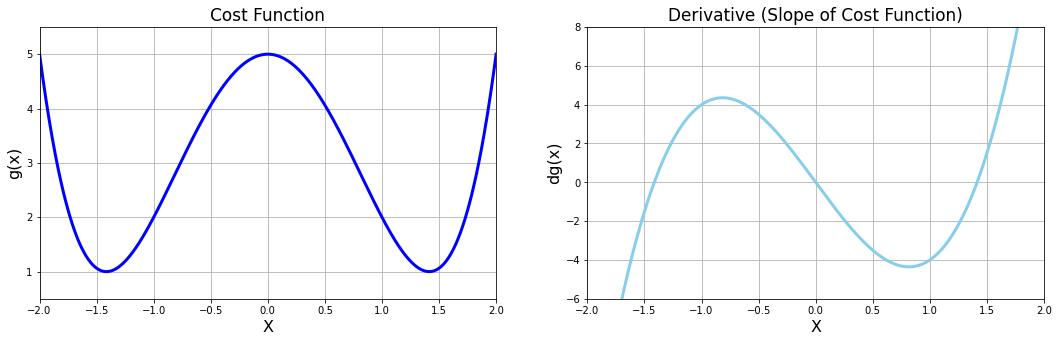

In [39]:
# Plot function and derivative

plt.figure(figsize=[18,5])

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.grid()
plt.plot(x_2, g(x_2), color="blue", linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Derivative (Slope of Cost Function)', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=3)

plt.show()

# Gradient descent as a Python Function

In [77]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [46]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=0.5, 
                                                 multiplier=0.02, 
                                                 precision=0.001)
print("Local min occurs at ", local_min)
print("Number of steps", len(list_x))


Local min occurs at  1.4122375085019094
Number of steps 23


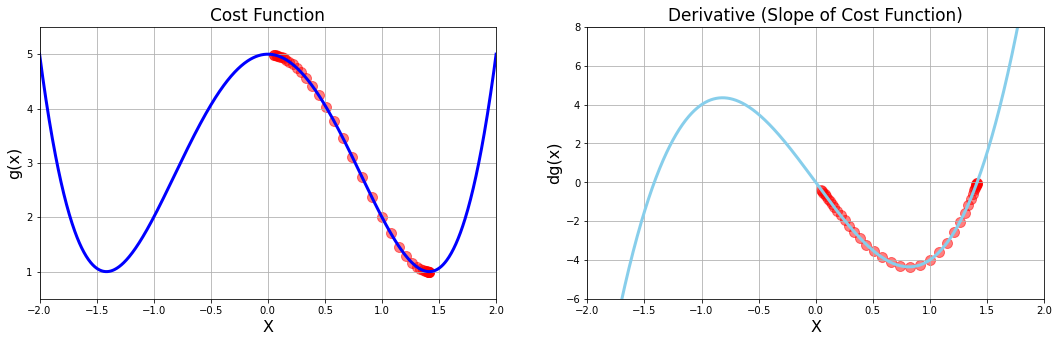

In [64]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=0.05, 
                                                 multiplier=0.02, 
                                                 precision=0.001)


# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[18,5])

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.grid()
plt.plot(x_2, g(x_2), color="blue", linewidth=3)

g_values = np.array(list_x)
plt.scatter(list_x, g(g_values), color='red', s=100, alpha=0.5)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Derivative (Slope of Cost Function)', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=3)

plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3- Divergence, Overflow and Python Tuples

## $$h(x)=x^5-2x^4+2$$

In [66]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3


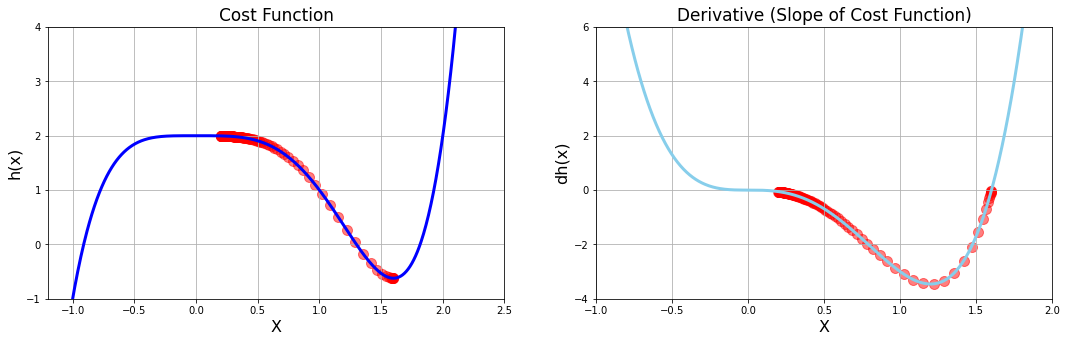

Local min occurs at 1.5989534547394717.
Cost at this minimum is -0.6214287992331258.
Number of steps is 117.


In [72]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, 
                                                 initial_guess=0.2, 
                                                 multiplier=0.02, 
                                                 precision=0.001)


# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[18,5])

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.title('Cost Function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("h(x)", fontsize=16)
plt.grid()
plt.plot(x_3, h(x_3), color="blue", linewidth=3)

h_values = np.array(list_x)
plt.scatter(list_x, h(h_values), color='red', s=100, alpha=0.5)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim([-1,2])
plt.ylim([-4,6])
plt.title('Derivative (Slope of Cost Function)', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)
plt.grid()
plt.plot(x_3, dh(x_3), color="skyblue", linewidth=3)

plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print(f"Local min occurs at {local_min}.")
print(f"Cost at this minimum is {h(local_min)}.")
print(f"Number of steps is {len(list_x)}.")

In [ ]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, 
                                                 initial_guess=-0.2, 
                                                 multiplier=0.02, 
                                                 precision=0.001)


# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[18,5])

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.title('Cost Function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("h(x)", fontsize=16)
plt.grid()
plt.plot(x_3, h(x_3), color="blue", linewidth=3)

h_values = np.array(list_x)
plt.scatter(list_x, h(h_values), color='red', s=100, alpha=0.5)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim([-1,2])
plt.ylim([-4,6])
plt.title('Derivative (Slope of Cost Function)', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)
plt.grid()
plt.plot(x_3, dh(x_3), color="skyblue", linewidth=3)

plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print(f"Local min occurs at {local_min}.")
print(f"Cost at this minimum is {h(local_min)}.")
print(f"Number of steps is {len(list_x)}.")

In [76]:
import sys
sys.version
sys.float_info.max

1.7976931348623157e+308

## The Learning Rate (Step Multiplier)

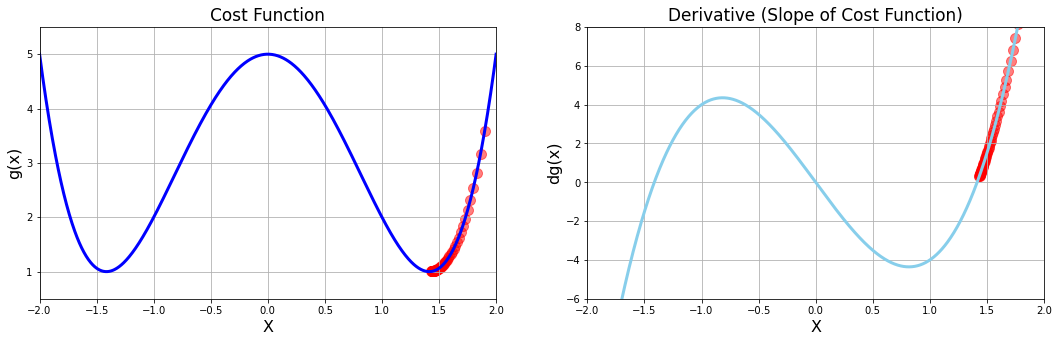

Number of steps is 58.


In [99]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=1.9, 
                                                 multiplier=0.003, 
                                                 precision=0.001,
                                                 max_iter = 500)


# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[18,5])

# 1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.grid()
plt.plot(x_2, g(x_2), color="blue", linewidth=3)

g_values = np.array(list_x)
plt.scatter(list_x, g(g_values), color='red', s=100, alpha=0.5)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Derivative (Slope of Cost Function)', fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=3)

plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print(f'Number of steps is {len(list_x)}.')

In [ ]:
# If we pick a large learning rate, it overflows. 
# If we pick a too small one, the algorithm might take forever